![knlogo](https://wp.kntu.ac.ir/aliakbarian/ode/images/logo.png)

<a href="https://colab.research.google.com/github/HesamTaherzadeh/Least-square-Optimization-And-Hypothesis-Testing/blob/main/Pre-Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color:Gray"> Least square optimization and hypothesis testing</h1>
<h2 style="color:Gray font'Serif'">Prerequisites(1): Introduction to Statistics </h2>
<h2 style="color:Gray"> Dr. Masoud Mashhadi </h2>
<h3 style="color:Gray"> Amirhesam Taherzadegani </h3>
<h4 style="color:Gray"> Geomatics engineering and geodesy faculty , KNTU </h4>

In [2]:
#!pip install 

In [3]:
import matplotlib.pyplot as plt 
import numpy as np 

![pic](https://files.realpython.com/media/anatomy.7d033ebbfbc8.png)

![pic2](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)

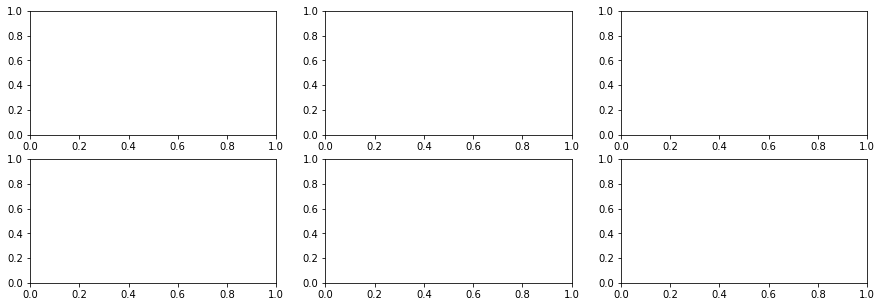

In [4]:
fig, ax = plt.subplots(2, 3, figsize=(15, 5))
plt.show()

In [5]:
fig, ax = plt.subplots(2, 3, figsize=(15, 5))
plt.close()
ax[0, 0]
#[)

<AxesSubplot:>

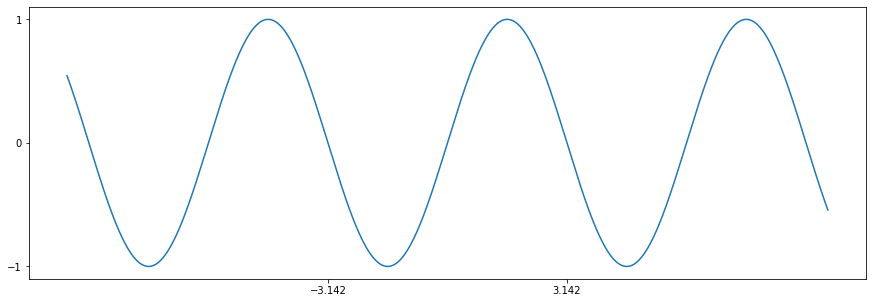

In [6]:
x = np.linspace(-10, 10, 1000)
y = np.sin(x)
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(x, y)
ax.set_xticks([-np.pi, np.pi])
ax.set_yticks([-1, 0, 1])
plt.show()

# Gaussian dist.

# $f(x)= {\frac{1}{\sigma\sqrt{2\pi}}}e^{- {\frac {1}{2}} (\frac {x-\mu}{\sigma})^2}$

In [7]:
x = np.linspace(-10, 10, 10000)
fx = lambda sig: np.exp(-0.5*(x/sig)**2)/ (sig*np.sqrt(2 * np.pi))

In [8]:
random_variances = sorted(np.random.uniform(0.001, 6, (18,)))

In [9]:
random_variances[2]

0.7125631501529013

In [11]:
font_style ={
    'fontname' : 'Times New Roman',
    'color': 'white'
}

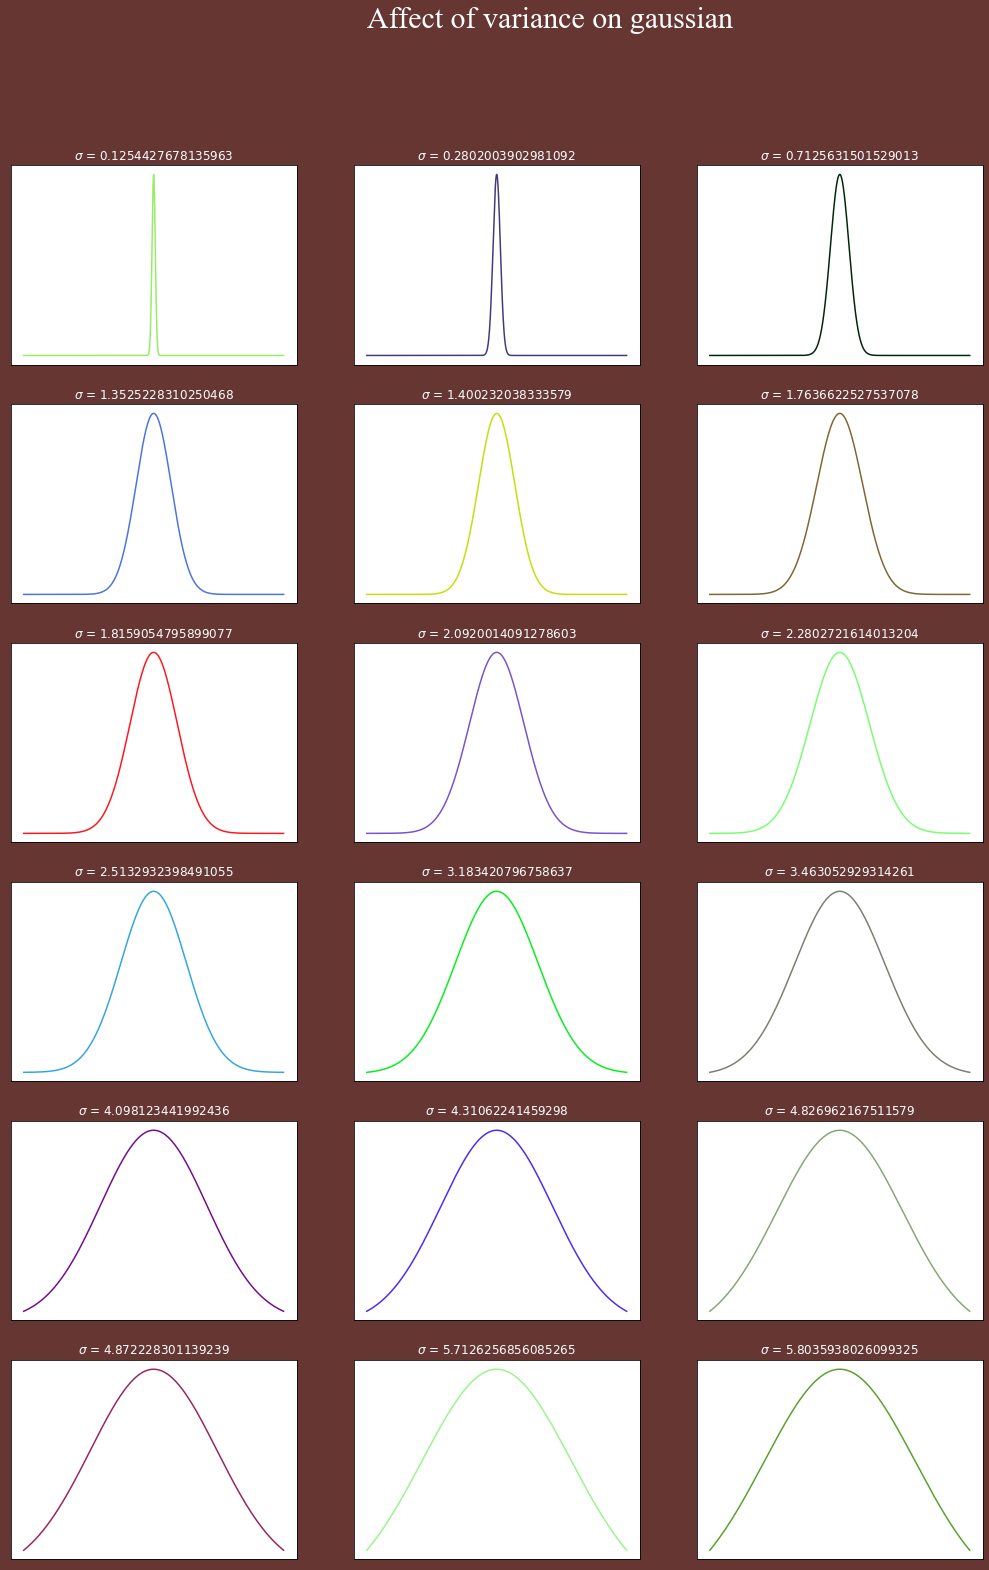

In [16]:
fig, ax = plt.subplots(6, 3, figsize=(15, 22), facecolor="#663633")
k = 0
for i in range(6):
    for j in range(3):
        c = np.random.random(3)
        ax[i, j].plot(fx(random_variances[k]), color= c)
        ax[i, j].set_title(r'$\sigma$' + " = " +  str(random_variances[k]), color = 'white')
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        k = k + 1
fig.suptitle(" Affect of variance on gaussian ", size=30, **font_style)
fig.subplots_adjust(left=0, bottom=0)
plt.show()

# Box Plot - Histogram - scatter plot

In [17]:
import pandas as pd

In [21]:
data = pd.read_csv(r'C:\Users\Samina\Desktop\covid19-jhon hopkins.csv')
data

,country_or_region,province_or_state,state_and_country,date,daily_new_cases,running_total_cases,running_total_cases_prev_day,daily_new_deaths,running_total_deaths,running_total_deaths_prev_day,...,country_code_3,country_population_2018,country_median_age,country_running_agg,location,country_or_region_day_number,province_or_state_day_number,state_and_country_day_number,country_code_2_day_number,country_code_3_day_number
0,Taiwan*,Not Provided,Not Provided-Taiwan*,1/22/2020,1,1,0,0,0,0,...,NaN,NaN,NaN,1,"23.7,121.0",1,1,1,1,1
1,Thailand,Not Provided,Not Provided-Thailand,1/22/2020,2,2,0,0,0,0,...,THA,6.942852e+07,37.7,2,"15.0,101.0",1,2,1,1,1
2,US,Not Provided,Not Provided-US,1/22/2020,1,1,0,0,0,0,...,USA,3.271674e+08,38.1,1,"37.0902,-95.7129",1,3,1,1,1
3,China,Zhejiang,Zhejiang-China,1/22/2020,10,10,0,0,0,0,...,CHN,1.392730e+09,37.4,548,"29.1832,120.0934",1,1,1,1,1
4,China,Yunnan,Yunnan-China,1/22/2020,1,1,0,0,0,0,...,CHN,1.392730e+09,37.4,548,"24.974,101.48700000000001",2,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16654,Netherlands,Curacao,Curacao-Netherlands,4/24/2020,2,16,14,0,1,1,...,NLD,1.723102e+07,42.6,36729,"12.1696,-68.99",289,58,58,289,289
16655,Netherlands,Aruba,Aruba-Netherlands,4/24/2020,0,100,100,0,2,2,...,NLD,1.723102e+07,42.6,36729,"12.5186,-70.0358",290,58,58,290,290
16656,Nepal,Not Provided,Not Provided-Nepal,4/24/2020,1,49,48,0,0,0,...,NPL,2.808787e+07,24.1,49,"28.1667,84.25",91,9367,91,91,91
16657,Morocco,Not Provided,Not Provided-Morocco,4/24/2020,190,3758,3568,3,158,155,...,MAR,3.602914e+07,29.3,3758,"31.7917,-7.0926",54,9368,54,54,54


In [22]:
data.head(5)

,country_or_region,province_or_state,state_and_country,date,daily_new_cases,running_total_cases,running_total_cases_prev_day,daily_new_deaths,running_total_deaths,running_total_deaths_prev_day,...,country_code_3,country_population_2018,country_median_age,country_running_agg,location,country_or_region_day_number,province_or_state_day_number,state_and_country_day_number,country_code_2_day_number,country_code_3_day_number
0,Taiwan*,Not Provided,Not Provided-Taiwan*,1/22/2020,1,1,0,0,0,0,...,NaN,NaN,NaN,1,"23.7,121.0",1,1,1,1,1
1,Thailand,Not Provided,Not Provided-Thailand,1/22/2020,2,2,0,0,0,0,...,THA,6.942852e+07,37.7,2,"15.0,101.0",1,2,1,1,1
2,US,Not Provided,Not Provided-US,1/22/2020,1,1,0,0,0,0,...,USA,3.271674e+08,38.1,1,"37.0902,-95.7129",1,3,1,1,1
3,China,Zhejiang,Zhejiang-China,1/22/2020,10,10,0,0,0,0,...,CHN,1.392730e+09,37.4,548,"29.1832,120.0934",1,1,1,1,1
4,China,Yunnan,Yunnan-China,1/22/2020,1,1,0,0,0,0,...,CHN,1.392730e+09,37.4,548,"24.974,101.48700000000001",2,1,1,2,2


In [24]:
data.columns

Index(['country_or_region', 'province_or_state', 'state_and_country', 'date',
       'daily_new_cases', 'running_total_cases',
       'running_total_cases_prev_day', 'daily_new_deaths',
       'running_total_deaths', 'running_total_deaths_prev_day', 'data_source',
       'lat', 'long', 'first_case_state_rank', 'first_case_country_rank',
       'hundred_case_state_rank', 'hundred_case_country_rank',
       'country_code_2', 'country_code_3', 'country_population_2018',
       'country_median_age', 'country_running_agg', 'location',
       'country_or_region_day_number', 'province_or_state_day_number',
       'state_and_country_day_number', 'country_code_2_day_number',
       'country_code_3_day_number'],
      dtype='object')

In [26]:
new_data = data[['country_or_region','daily_new_cases' ]]
new_data

,country_or_region,daily_new_cases
0,Taiwan*,1
1,Thailand,2
2,US,1
3,China,10
4,China,1
...,...,...
16654,Netherlands,2
16655,Netherlands,0
16656,Nepal,1
16657,Morocco,190


In [31]:
new_data["country_or_region"].unique().shape

(185,)

In [46]:
random = np.random.randint(0, 184, (15, ))
random

array([122,  35,  42,  24, 133, 111, 166, 180, 128, 132,  88, 117, 118,
       127,   7])

In [47]:
# <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html"> 

<AxesSubplot:ylabel='Frequency'>

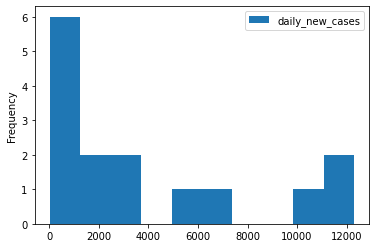

In [50]:
pd.DataFrame(new_data["daily_new_cases"].groupby(new_data["country_or_region"]).sum()).iloc[random].plot(kind='hist')

In [54]:
linalg = pd.read_excel(r'C:\Users\Samina\Desktop\a.xlsx')

In [55]:
linalg.columns

Index(['ردیف', 'نام و نام خانوادگی', 'دفعات مشارکت در کلاس', 'اعمال امتیازی',
       'دفعات مشارکت در ارائه ها', 'جمع مشارکت', 'نمره کلاسی نهایی',
       'تمرین دو', 'تمرین سه', 'تمرین چهارم', 'میانگین سه تمرین', 'نمره نهایی',
       'اطلاعات آماری فعالیت کلاسی', 'Unnamed: 13'],
      dtype='object')

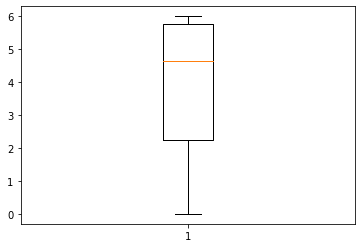

In [59]:
plt.boxplot(linalg['نمره نهایی'].to_numpy())
plt.show()

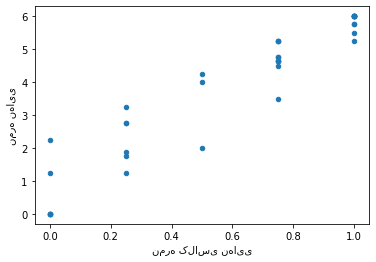

In [61]:
linalg[["نمره نهایی", "نمره کلاسی نهایی"]].plot(kind="scatter", x="نمره کلاسی نهایی", y="نمره نهایی")
plt.show()

## it can be seen that if there you had good class activities you had good last grade too

## Correlation is not Casuation

In [ ]:
# pearson correlation

In [62]:
x = linalg['نمره نهایی']
y = linalg['نمره کلاسی نهایی']

In [70]:
meanx = np.mean(x)
meany = np.mean(y)

In [71]:
xmmean = x - meanx
ymmean = y - meany

In [77]:
num = np.sum(xmmean * ymmean)

In [78]:
denum = np.sqrt(np.sum(xmmean**2) * np.sum(ymmean**2))

In [79]:
num / denum

0.9510028343570908

# $r =\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum\left(x_{i}-\bar{x}\right)^{2} \sum\left(y_{i}-\bar{y}\right)^{2}}}$

# Normal curve

In [83]:
mu , sigma = 0, 0.5
X = np.random.normal(mu, sigma, 10000)
X

array([-0.29559508, -0.98470421,  0.08595685, ...,  0.65130343,
       -0.4553511 , -0.27590324])

In [85]:
histogram, bin_edge = np.histogram(X)

# $\hat{x } \pm \sigma \to $ 0.65 of data
# $\hat{x } \pm 2\sigma \to $ 0.95 of data
# $\hat{x } \pm 3\sigma \to $ 0.99 of data

# Z-score $\to $ deviation coefficent from mean
# $Z =\frac{ X - \hat{x}}{s}$

# PDF, PMF, CDF, PPF

## The cumulative distribution function (CDF) is the probability that a random variable, say X, will take a value less than or equal to x.
## For example, if you roll a die, the probability of obtaining 1, 2, 3, 4, 5, or 6 is 16.667% (=1/6). The cumulative distribution function (CDF) of 1 is the probability that the next roll will take a value less than or equal to 1 and is equal to 16.667% as there is only one possible way to get a 1.

## The probability density function (PDF) is the probability that a random variable, say X, will take a value exactly equal to x.

## For example, if you roll a die, the probability of obtaining 1, 2, 3, 4, 5, or 6 is 16.667% (=1/6). The probability density function (PDF) or the probability that you will get exactly 2 will be 16.667%.

## Equivalent of PDF in discrete disturbuation is called PMF

![IMAGE](https://www.graduatetutor.com/wp-content/uploads/2021/03/Cumulative-Density-Function-of-a-dice-6.jpg)

## To find the median of a distribution, we can use the Percent Point Function (PPF), which is the inverse of the CDF.

# Covariance matrix

## 	The covariance matrix ΣXX is a symmetric positive semi-definite matrix whose element in the 𝑗, 𝑘 position is the covariance between the 𝑗𝑡ℎ and 𝑘𝑡ℎ elements of a random vector. ie the j and k columns of X.

## the Diagonal elements show the variance since COV(X,X) = VAR(X)





## What will happen if we measure the distances with different accuracies 

# Other useful disturbuations

# Chi-squared

# t-student

# Confidence interval 

# $\mu \in  \hat{x} \space \pm Z\frac{s}{\sqrt{n}}$

# $\mu \in  \hat{x} \space \pm t_{n-1}\frac{s}{\sqrt{n}}$

# Hypothesis Testing

## We test if a statement is statistically significant or not

# REMEMBER 
# H0: Nothing extraordinary is going on 
# Whatever the observation states

# HA: Alternative 
# Something is off

- ## Type I error: When we reject the null hypothesis, although that hypothesis was true. Type I error is denoted by alpha. In hypothesis testing, the normal curve that shows the critical region is called the alpha region

- ## Type II errors: When we accept the null hypothesis but it is false. Type II errors are denoted by beta. In Hypothesis testing, the normal curve that shows the acceptance region is called the beta region.

## One tailed test :- A test of a statistical hypothesis , where the region of rejection is on only one side of the sampling distribution , is called a one-tailed test.

# Two-tailed test :- A two-tailed test is a statistical test in which the critical area of a distribution is two-sided and tests whether a sample is greater than or less than a certain range of values. If the sample being tested falls into either of the critical areas, the alternative hypothesis is accepted instead of the null hypothesis.

![stat](https://www.fromthegenesis.com/wp-content/uploads/2018/06/Types-of-Hypothesis-Tests.jpg)

# Z-test 

# $Z_{score} = \frac{observered - expected}{SE}$
# $SE := \text{Standard Error} = \frac{\sigma}{\sqrt{n}}$

## Several different types of tests are used in statistics (i.e. f test, chi square test, t test). You would use a Z test if:
## Your sample size is greater than 30. Otherwise, use a t test.
## Data points should be independent from each other. In other words, one data point isn’t related or doesn’t affect another data point.
## Your data should be normally distributed. However, for large sample sizes (over 30) this doesn’t always matter.
## Your data should be randomly selected from a population, where each item has an equal chance of being selected.
## Sample sizes should be equal if at all possible.

## P-value if under the $1 - \alpha$ we can say that we in $\alpha$ percent confidence dont have enough evidence to accept the Null hypotheis 
## otherwise we will accept it

## A t-test is used to compare the mean of two given samples. Like a z-test, a t-test also assumes a normal distribution of the sample. A t-test is used when the population parameters (mean and standard deviation) are not known.

## The t score is a ratio between the difference between two groups and the difference within the groups. The larger the t score, the more difference there is between group

# ANOVA (Analysis of Variance), shapiro test(Is data following normal dist)-bartlett(Homogenity)

![anova](https://cdn1.byjus.com/wp-content/uploads/2020/09/one-way-ANOVA-formulas.png)

![shapiro](https://spss-tutorials.com/img/shapiro-wilk-test-what-is-it.png)